### Стадия инициализации и обучения нейронных сетей

In [1]:
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, DataLoader
import os
import random
import seaborn as sns
import torch,torchvision
from  matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Для воспроизводимости результатов зафиксируем сиды:
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed(42)
torch.backends.cudnn.deterministic = True

In [3]:
pwd = os.getcwd()
print('Текущее расположение репозитория', pwd)

Текущее расположение репозитория D:\Python_notebooks\repository_Koldim2001\transfer_learning_CNN
Список файлов ['dataset_test.pth', 'dataset_train.pth', 'dataset_val.pth']


In [6]:
directory = pwd + '\preprocessed_data'
if not os.path.exists(directory):
    print('Отсутвуют датасеты, так что требуется запустить файл data_preprocessing.ipynb')
else:
    print('Загруженные на компьютер датасеты найдены')
    list_files = os.listdir('preprocessed_data')
    print('Список файлов', list_files)

Загруженные на компьютер датасеты найдены
Список файлов ['dataset_test.pth', 'dataset_train.pth', 'dataset_val.pth']


Загрузим предобработанные датасеты. Заново преопределим класс MakeDataset и зададим посчитанные ранее значения среднего и ско по трейновому датасету

In [37]:
class MakeDataset(Dataset):
    def __init__(self, df, transform=None):
        df = df.to_numpy()
        self.x = df[:,0]
        self.y = df[:,2]
        self.n_samples = df.shape[0]
        self.transform = transform
        
    def __getitem__(self, index):
        sample = self.x[index]/225 #привел значения тензоров к дапазону от 0 до 1
        sample = torch.tensor(np.expand_dims(sample, axis=0)) #добавил канал 1 
        # теперь данные - тензор 1 х H x W
        
        if self.transform is not None:
            sample = self.transform(sample)
        return (sample,  torch.tensor([self.y[index]]))
        
    def __len__(self):
        return self.n_samples

In [27]:
mean_nums = torch.tensor([0.5461])
std_nums = torch.tensor([0.2567])

In [33]:
dataset_train = torch.load(os.path.join(directory, 'dataset_train.pth'))

In [9]:
dataset_test = torch.load(os.path.join(directory, 'dataset_test.pth'))

In [ ]:
dataset_val = torch.load(os.path.join(directory, 'dataset_val.pth'))

Зададим вычислительное устройство:

In [28]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [29]:
batch_size = 8 # зададим размер батча

In [ ]:
Проверим правильность загруженных данных:

In [31]:
def imshow(img):
    img = img *std_nums + mean_nums  
    img = img.cpu().numpy()
    plt.imshow(np.transpose(img, (1, 2, 0)))  
    plt.show()

In [38]:
dataloader_test = DataLoader(dataset=dataset_test, batch_size=batch_size, shuffle=True, num_workers=0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


test:


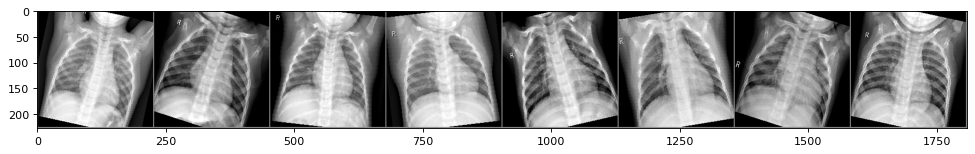

GroundTruth:  norm,  norm,  norm,  norm,  norm,  norm,  norm,  norm


In [58]:
classes = ['norm','pneumonia']
image_batch, label_batch = next(iter(dataloader_test))
image_batch, label_batch = image_batch.to(device), label_batch.to(device)
print('test:')
plt.figure(figsize=(15, 9), dpi=80)
# выводим изображения в батче
imshow(torchvision.utils.make_grid(image_batch))
print('GroundTruth: ', ',  '.join( classes[int(label_batch[j])] for j in range(batch_size)))

In [42]:
dataloader_train = DataLoader(dataset=dataset_train, batch_size=batch_size, shuffle=True, num_workers=0)

NameError: name 'dataset_train' is not defined

In [ ]:
image_batch, label_batch = next(iter(dataloader_test))
image_batch, label_batch = image_batch.to(device), label_batch.to(device)
print('train:')
plt.figure(figsize=(15, 9), dpi=80)
# выводим изображения в батче
imshow(torchvision.utils.make_grid(image_batch))
print('GroundTruth: ', ',  '.join( classes[int(label_batch[j])] for j in range(batch_size)))